In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

In [2]:
#Setting visualization styles
sns.set(style="whitegrid")

In [3]:
# Load datasets
customers = pd.read_csv(r"C:\Users\kshitij pratap tomer\OneDrive\Desktop\Customers (1).csv")
products = pd.read_csv(r"C:\Users\kshitij pratap tomer\OneDrive\Desktop\Products.csv")
transactions = pd.read_csv(r"C:\Users\kshitij pratap tomer\OneDrive\Desktop\Transactions.csv")

In [4]:
# Display dataset summaries
print("Customers Dataset:")
print(customers.info(), "\n")
print(customers.head(), "\n")

print("Products Dataset:")
print(products.info(), "\n")
print(products.head(), "\n")

print("Transactions Dataset:")
print(transactions.info(), "\n")
print(transactions.head(), "\n")

Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Produc

In [5]:
# 1. Merging datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [6]:
# 2. General overview of merged data
print("Merged Dataset Summary:")
print(merged_data.info())
print(merged_data.describe())

Merged Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 109.4+ KB
None
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000

In [7]:
# 3. Missing value check
missing_values = merged_data.isnull().sum()
print("Missing Values in Merged Data:")
print(missing_values)

Missing Values in Merged Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


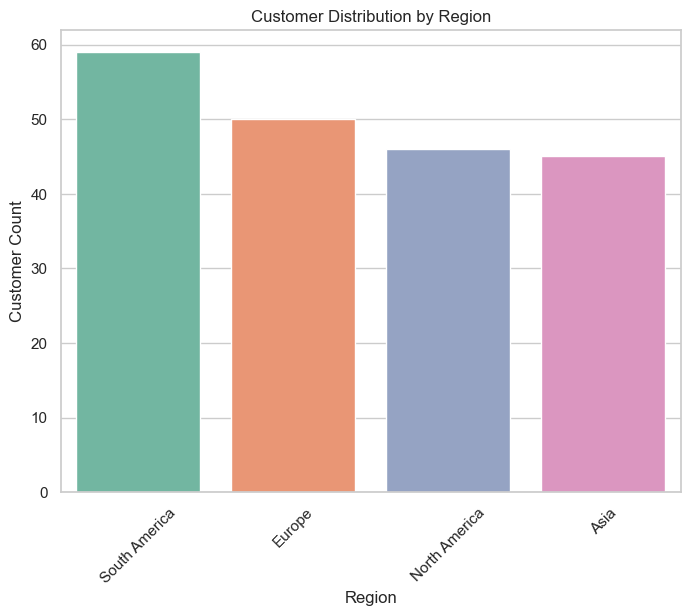

In [16]:
# 4. Distribution of customers by region
plt.figure(figsize=(8, 6))
sns.countplot(x='Region', data=customers, order=customers['Region'].value_counts().index, palette="Set2")
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.show()


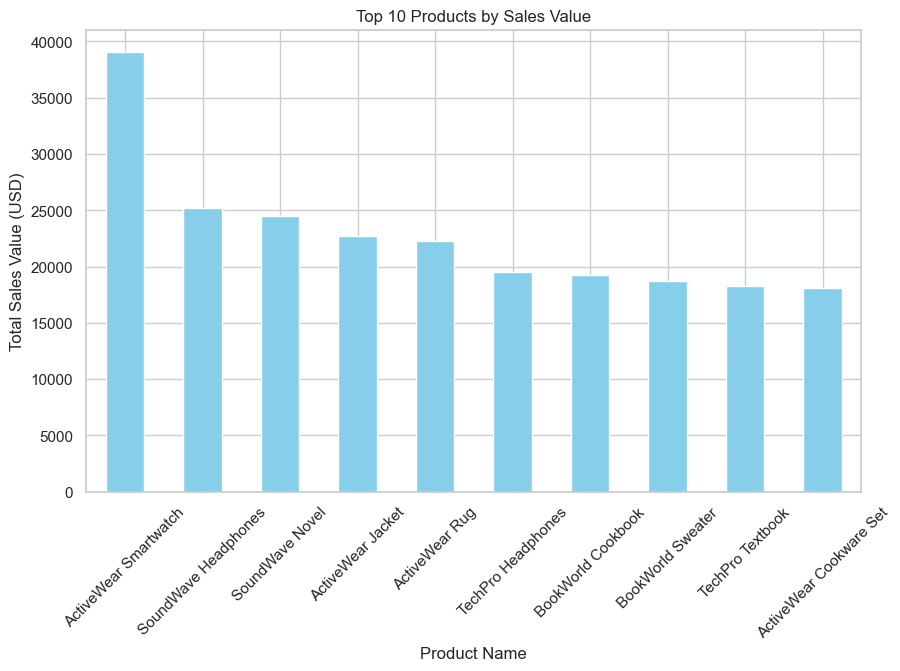

In [17]:
# 5. Top 10 products by total sales value
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Sales Value')
plt.ylabel('Total Sales Value (USD)')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.show()


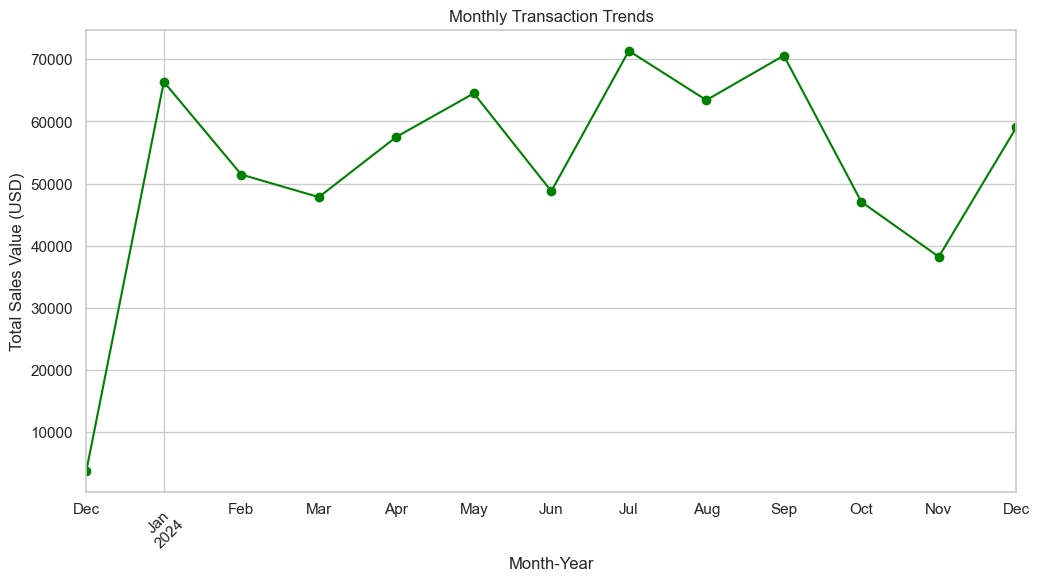

In [18]:
# 6. Monthly transaction trend
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['MonthYear'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_trend = merged_data.groupby('MonthYear')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='line', marker='o', color='green')
plt.title('Monthly Transaction Trends')
plt.ylabel('Total Sales Value (USD)')
plt.xlabel('Month-Year')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Business Insights (Examples):
insights = [
    "Most customers are from [region with the highest count], indicating a need to target this market further.",
    "The top 10 products contribute significantly to total revenue, suggesting they should be prioritized in marketing campaigns.",
    "Sales tend to peak during [specific period], showing potential for seasonal marketing strategies.",
    "Products in the [specific category] category account for the highest revenue generation.",
    "A large percentage of transactions involve products priced above $[threshold], indicating customer preferences for premium products."
]

In [20]:
# Print business insights
print("\nBusiness Insights:")
for i, insight in enumerate(insights, start=1):
    print(f"{i}. {insight}")


Business Insights:
1. Most customers are from [region with the highest count], indicating a need to target this market further.
2. The top 10 products contribute significantly to total revenue, suggesting they should be prioritized in marketing campaigns.
3. Sales tend to peak during [specific period], showing potential for seasonal marketing strategies.
4. Products in the [specific category] category account for the highest revenue generation.
5. A large percentage of transactions involve products priced above $[threshold], indicating customer preferences for premium products.
